# Starter Notebook
Describe your experiment here.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset

df = pd.read_csv('../data/creditcard.csv')

In [5]:
# Overview

print(df.shape)
print(df.head)
print(df.info())

(284807, 31)
<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388 

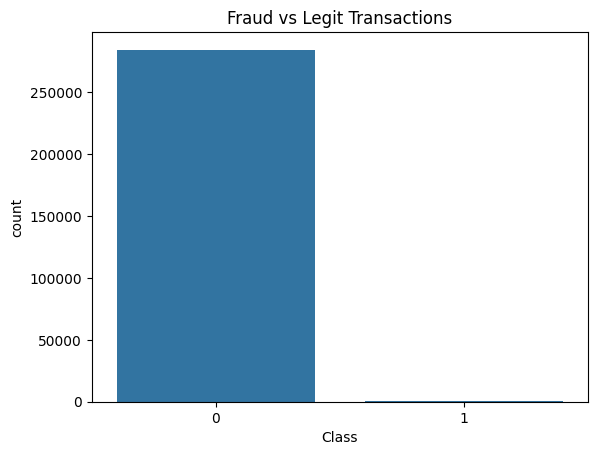

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [6]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Legit Transactions")
plt.show()

fraud_ratio = df['Class'].value_counts(normalize=True) * 100
print(fraud_ratio)

In [7]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


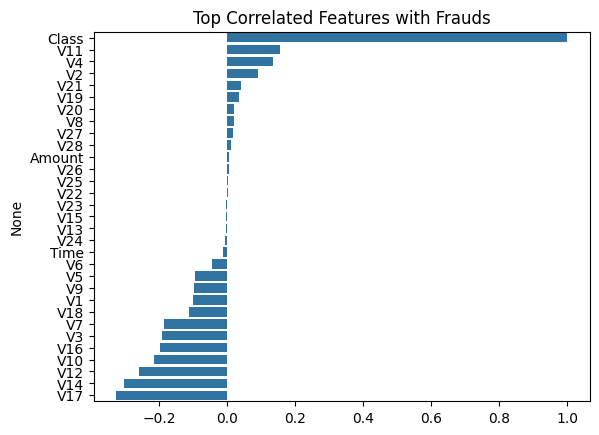

In [14]:
corr = df.corr()['Class'].sort_values(ascending=False)
print(corr)

sns.barplot(x=corr.values, y=corr.index)
plt.title("Top Correlated Features with Frauds")
plt.show()

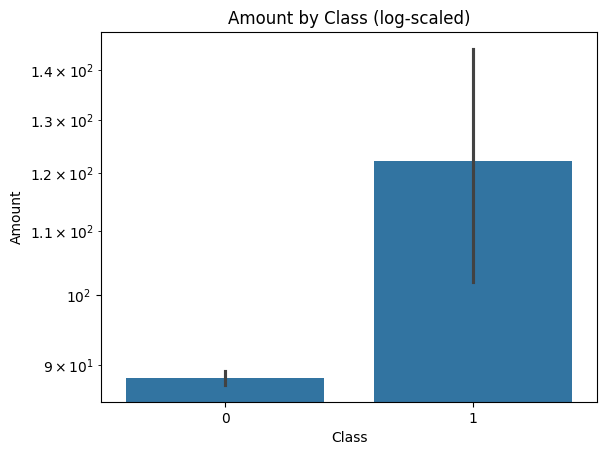

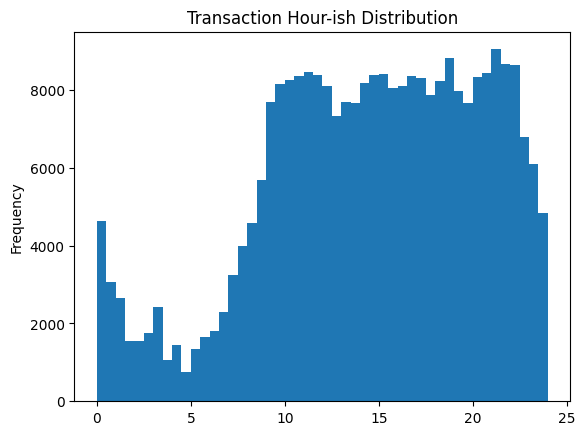

In [16]:
sns.barplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title("Amount by Class (log-scaled)")
plt.show()

# Time vs Class: does fraud cluster by time of day?
# Time is seconds since first txn; hour-like feature:
(df['Time'] % (24*3600) / 3600).rename('Hour').plot(kind='hist', bins=48)
plt.title("Transaction Hour-ish Distribution"); plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob))

[[55475  1389]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962

ROC-AUC: 0.9721669425367221


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


In [27]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(Y_test, y_pred_rf, digits=4))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob_rf))


              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.9571890288895525


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(Y_train[Y_train==0]) / len(Y_train[Y_train==1]),
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]


In [30]:
print(classification_report(Y_test, y_pred_xgb, digits=4))
print("ROC-AUC:", roc_auc_score(Y_test, y_prob_xgb))


              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8542    0.8367    0.8454        98

    accuracy                         0.9995     56962
   macro avg     0.9269    0.9182    0.9225     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.976033579582649


In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)
print(Y_train.value_counts(), "\n→\n", y_res.value_counts())


Class
0    227451
1       394
Name: count, dtype: int64 
→
 Class
0    227451
1    227451
Name: count, dtype: int64


In [32]:
import joblib
joblib.dump(xgb, '../models/fraud_detector_xgb.joblib')
print("✅ Model saved to models/fraud_detector_xgb.joblib")


✅ Model saved to models/fraud_detector_xgb.joblib


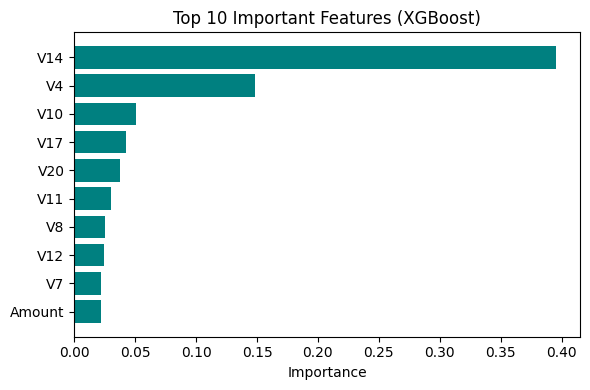

In [33]:
import matplotlib.pyplot as plt
import numpy as np

importances = xgb.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(6,4))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top 10 Important Features (XGBoost)")
plt.tight_layout()
plt.show()
